In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV


In [86]:
df = pd.read_csv('weatherAUS.csv')

In [87]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [88]:
df.shape

(145460, 23)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [90]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [91]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Here we are seeing that, there are four features which contains around (45-50)%  of missing value.
And we cann't also just delete them, because those could greatly impact in our modeling.So Our first task is to 
check this then start proceding.

In [92]:
Miss_tar = df[['Evaporation', 'Sunshine', 'Cloud9am','Cloud3pm','RainTomorrow']]

In [93]:
Miss_tar['RainTomorrow'] = Miss_tar['RainTomorrow'].fillna('No')

<ipython-input-93-bab6433937c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Miss_tar['RainTomorrow'] = Miss_tar['RainTomorrow'].fillna('No')


In [94]:
Miss_tar.head(5)

,Evaporation,Sunshine,Cloud9am,Cloud3pm,RainTomorrow
0,NaN,NaN,8.0,NaN,No
1,NaN,NaN,NaN,NaN,No
2,NaN,NaN,NaN,2.0,No
3,NaN,NaN,NaN,NaN,No
4,NaN,NaN,7.0,8.0,No


In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Miss_tar['RainTomorrow'] = le.fit_transform(Miss_tar['RainTomorrow'])

<ipython-input-95-04f7796c08e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Miss_tar['RainTomorrow'] = le.fit_transform(Miss_tar['RainTomorrow'])


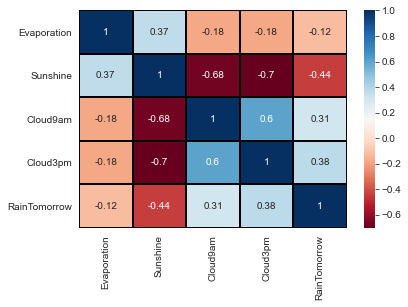

In [96]:
sns.heatmap(Miss_tar.corr(), cmap = 'RdBu', annot = True, linewidths=1, linecolor='black')

Here we are seeing that Cloud9am and Cloud3pm are roughly releated to our target variable and there 
is a good relationship between them also.And rest two are badly related with target and between themselves also.
So let's go with this two and let's see...

In [97]:
df = df.drop(['Evaporation','Sunshine'], axis = 1)

In [98]:
df['Cloud9am'] = df.Cloud9am.mean()

In [99]:
df['Cloud3pm'] = df.Cloud3pm.mean()

In [100]:
df.dropna(inplace = True)

In [101]:
np.round(df.isnull().mean())

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [102]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

#Let's have look at our variable

Variable Types

    1. Numerical variables:
       'MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed','WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
        
    2. Categorical variables:
       'Date', 'Location','WindGustDir','WindDir9am','WindDir3pm','RainToday', 'RainTomorrow'

In [103]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 14 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [104]:
df_num = df[numerical]

In [105]:
# find numerical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} numerical variables\n'.format(len(categorical)))

print('The numerical variables are :', categorical)

There are 7 numerical variables

The numerical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [106]:
df_cat = df[categorical]

Let's Analyse the data :

Let's start with spliting the date colimn into year, month and day. 

In [107]:
#first convert this 'date' column into datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [108]:
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month
df['Weakday'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day


In [109]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Quarter,Month,Weakday,Day
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,4.50993,16.9,21.8,No,No,2008,4,12,0,1
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,4.50993,17.2,24.3,No,No,2008,4,12,1,2
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,4.50993,21.0,23.2,No,No,2008,4,12,2,3
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,4.50993,18.1,26.5,No,No,2008,4,12,3,4
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,4.50993,17.8,29.7,No,No,2008,4,12,4,5


In [110]:
#Setting Date column as index
df = df.set_index('Date')

Before dig deep into time series analysis let's see how rain occurs with respect to Years.

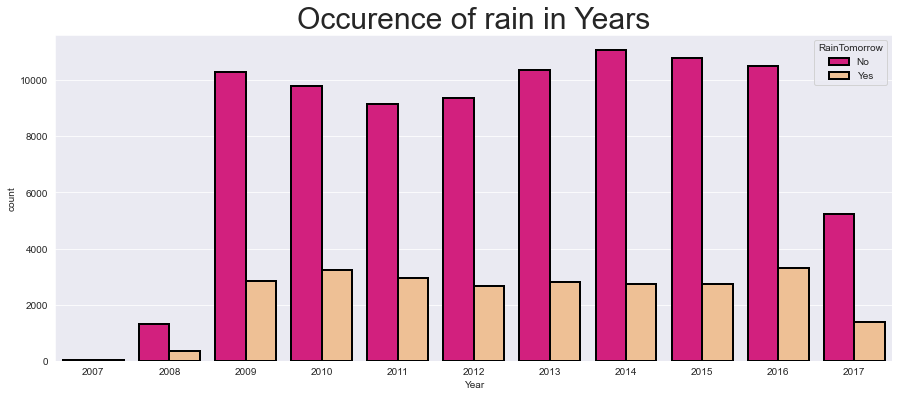

In [111]:
sns.set_style('darkgrid')
#sns.set_palette('Set1')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'Year', hue = 'RainTomorrow',edgecolor=(0,0,0),
                  linewidth=2,
              palette="Accent_r", data = df)
ax.set_title( "Occurence of rain in Years",size = 30 )
plt.show()

Here we are seeing  a seasonality.From a Certain year Rain starts increasing and after 3-4 years it's 
reaches to pick and start decreasing.........

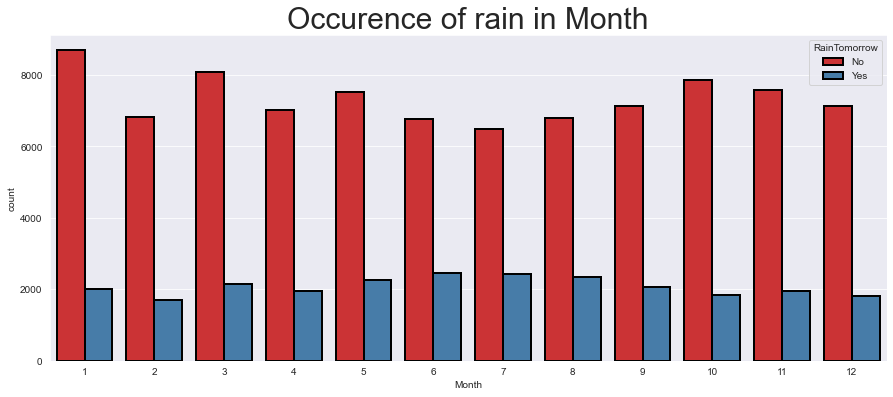

In [112]:
sns.set_style('darkgrid')
sns.set_palette('Set1')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'Month', hue = 'RainTomorrow',edgecolor=(0,0,0),
                  linewidth=2,
              data = df)
ax.set_title( "Occurence of rain in Month",size = 30 )
plt.show()

Here we are seeing that middle of the year rain occurs most frequently, specially in May, June, July, August.

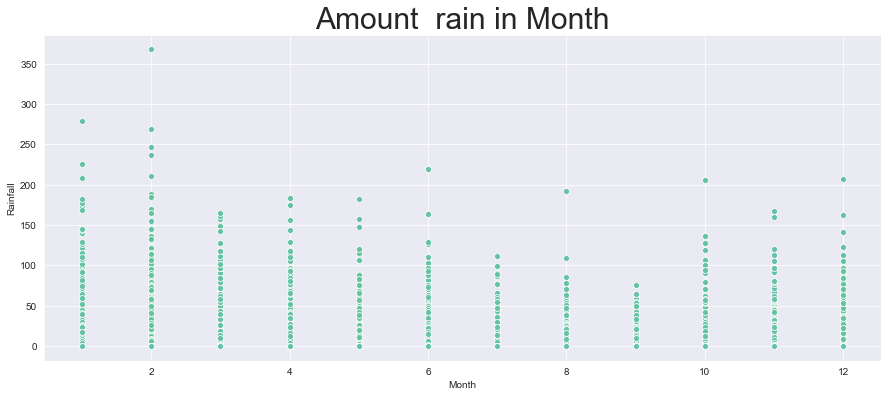

In [113]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=[15,6])
ax = sns.scatterplot(x = 'Month', y = 'Rainfall',data = df)
ax.set_title( "Amount  rain in Month",size = 30 )
plt.show()



Here some interesting things to notice.

Though rain is more frequent in the middle of the year, But the amount of rainfall is much more in Jan, Feb and later half of the year.

In many countries rain occurs in particular period of a year, but in australia rain is available in whole through the years.

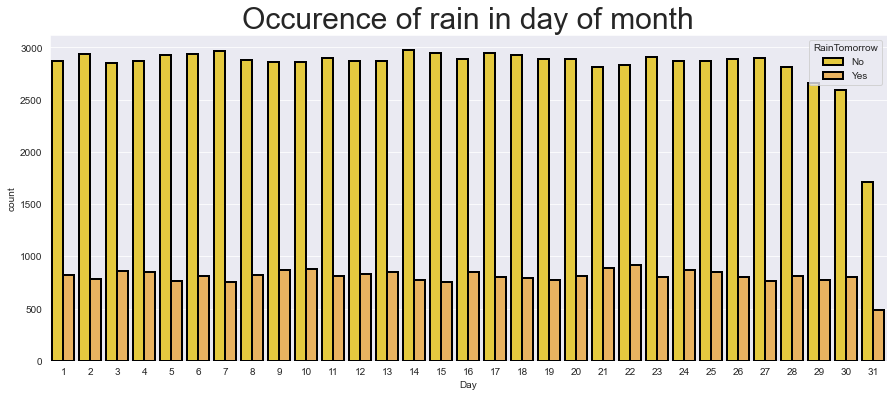

In [114]:
sns.set_style('darkgrid')
sns.set_palette('spring_r')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'Day', hue = 'RainTomorrow',edgecolor=(0,0,0),
                  linewidth=2,
              data = df)
ax.set_title( "Occurence of rain in day of month",size = 30 )
plt.show()

There are no such difference. Possibility of rain in the day range between 3-4, 8-11, 21-24 is slightly higher then others.

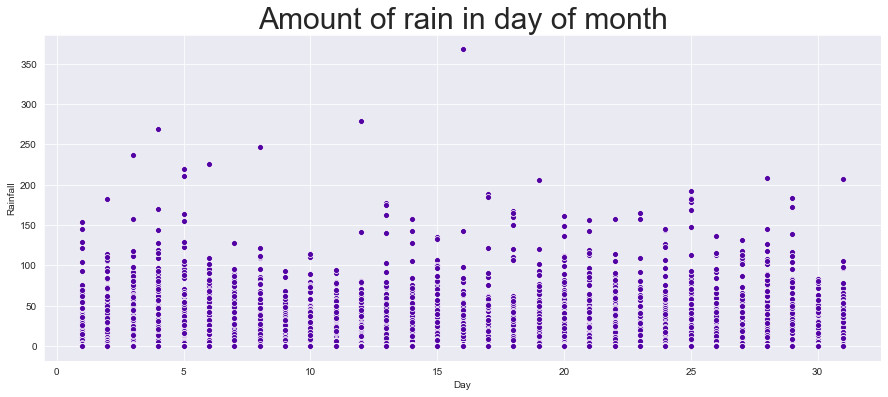

In [115]:
sns.set_style('darkgrid')
sns.set_palette('plasma')
plt.figure(figsize=[15,6])
ax = sns.scatterplot(x = 'Day', y = 'Rainfall',data = df)
ax.set_title( "Amount of rain in day of month",size = 30 )
plt.show()


Here We are seeing that starting couple of days and day range 12-14 and 20-27 having a havier rainfall.

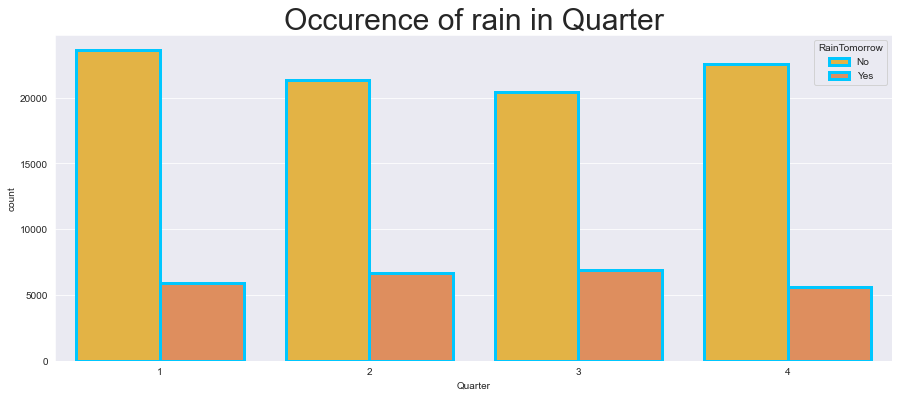

In [116]:
sns.set_style('darkgrid')
sns.set_palette('plasma_r')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'Quarter', hue = 'RainTomorrow',edgecolor=(0,.78,1),
                  linewidth=3,
              data = df)
ax.set_title( "Occurence of rain in Quarter",size = 30 )
plt.show()

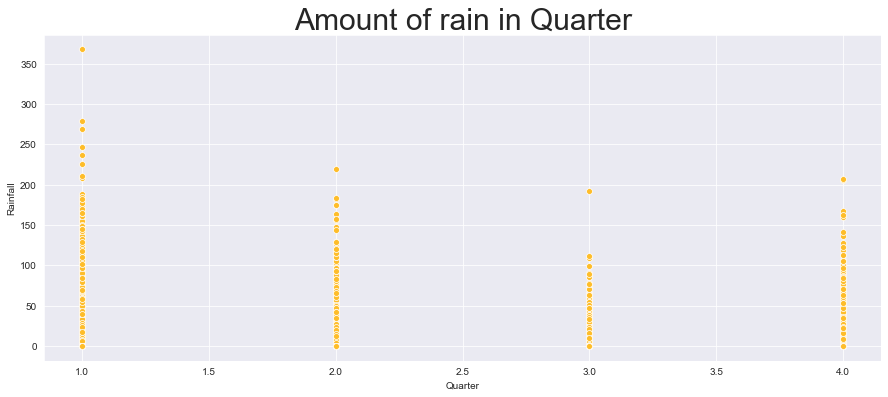

In [117]:
sns.set_style('darkgrid')
sns.set_palette('plasma_r')
plt.figure(figsize=[15,6])
ax = sns.scatterplot(x = 'Quarter', y = 'Rainfall',data = df)
ax.set_title( "Amount of rain in Quarter",size = 30 )
plt.show()


# Rules of Temperature:

If Temperature increases Pressure of air will be decreassed.

In [118]:
#Let's make new column to check how temp is changing.
df['Temp_diff'] = df['Temp3pm'] - df['Temp9am']

<Figure size 432x288 with 0 Axes>

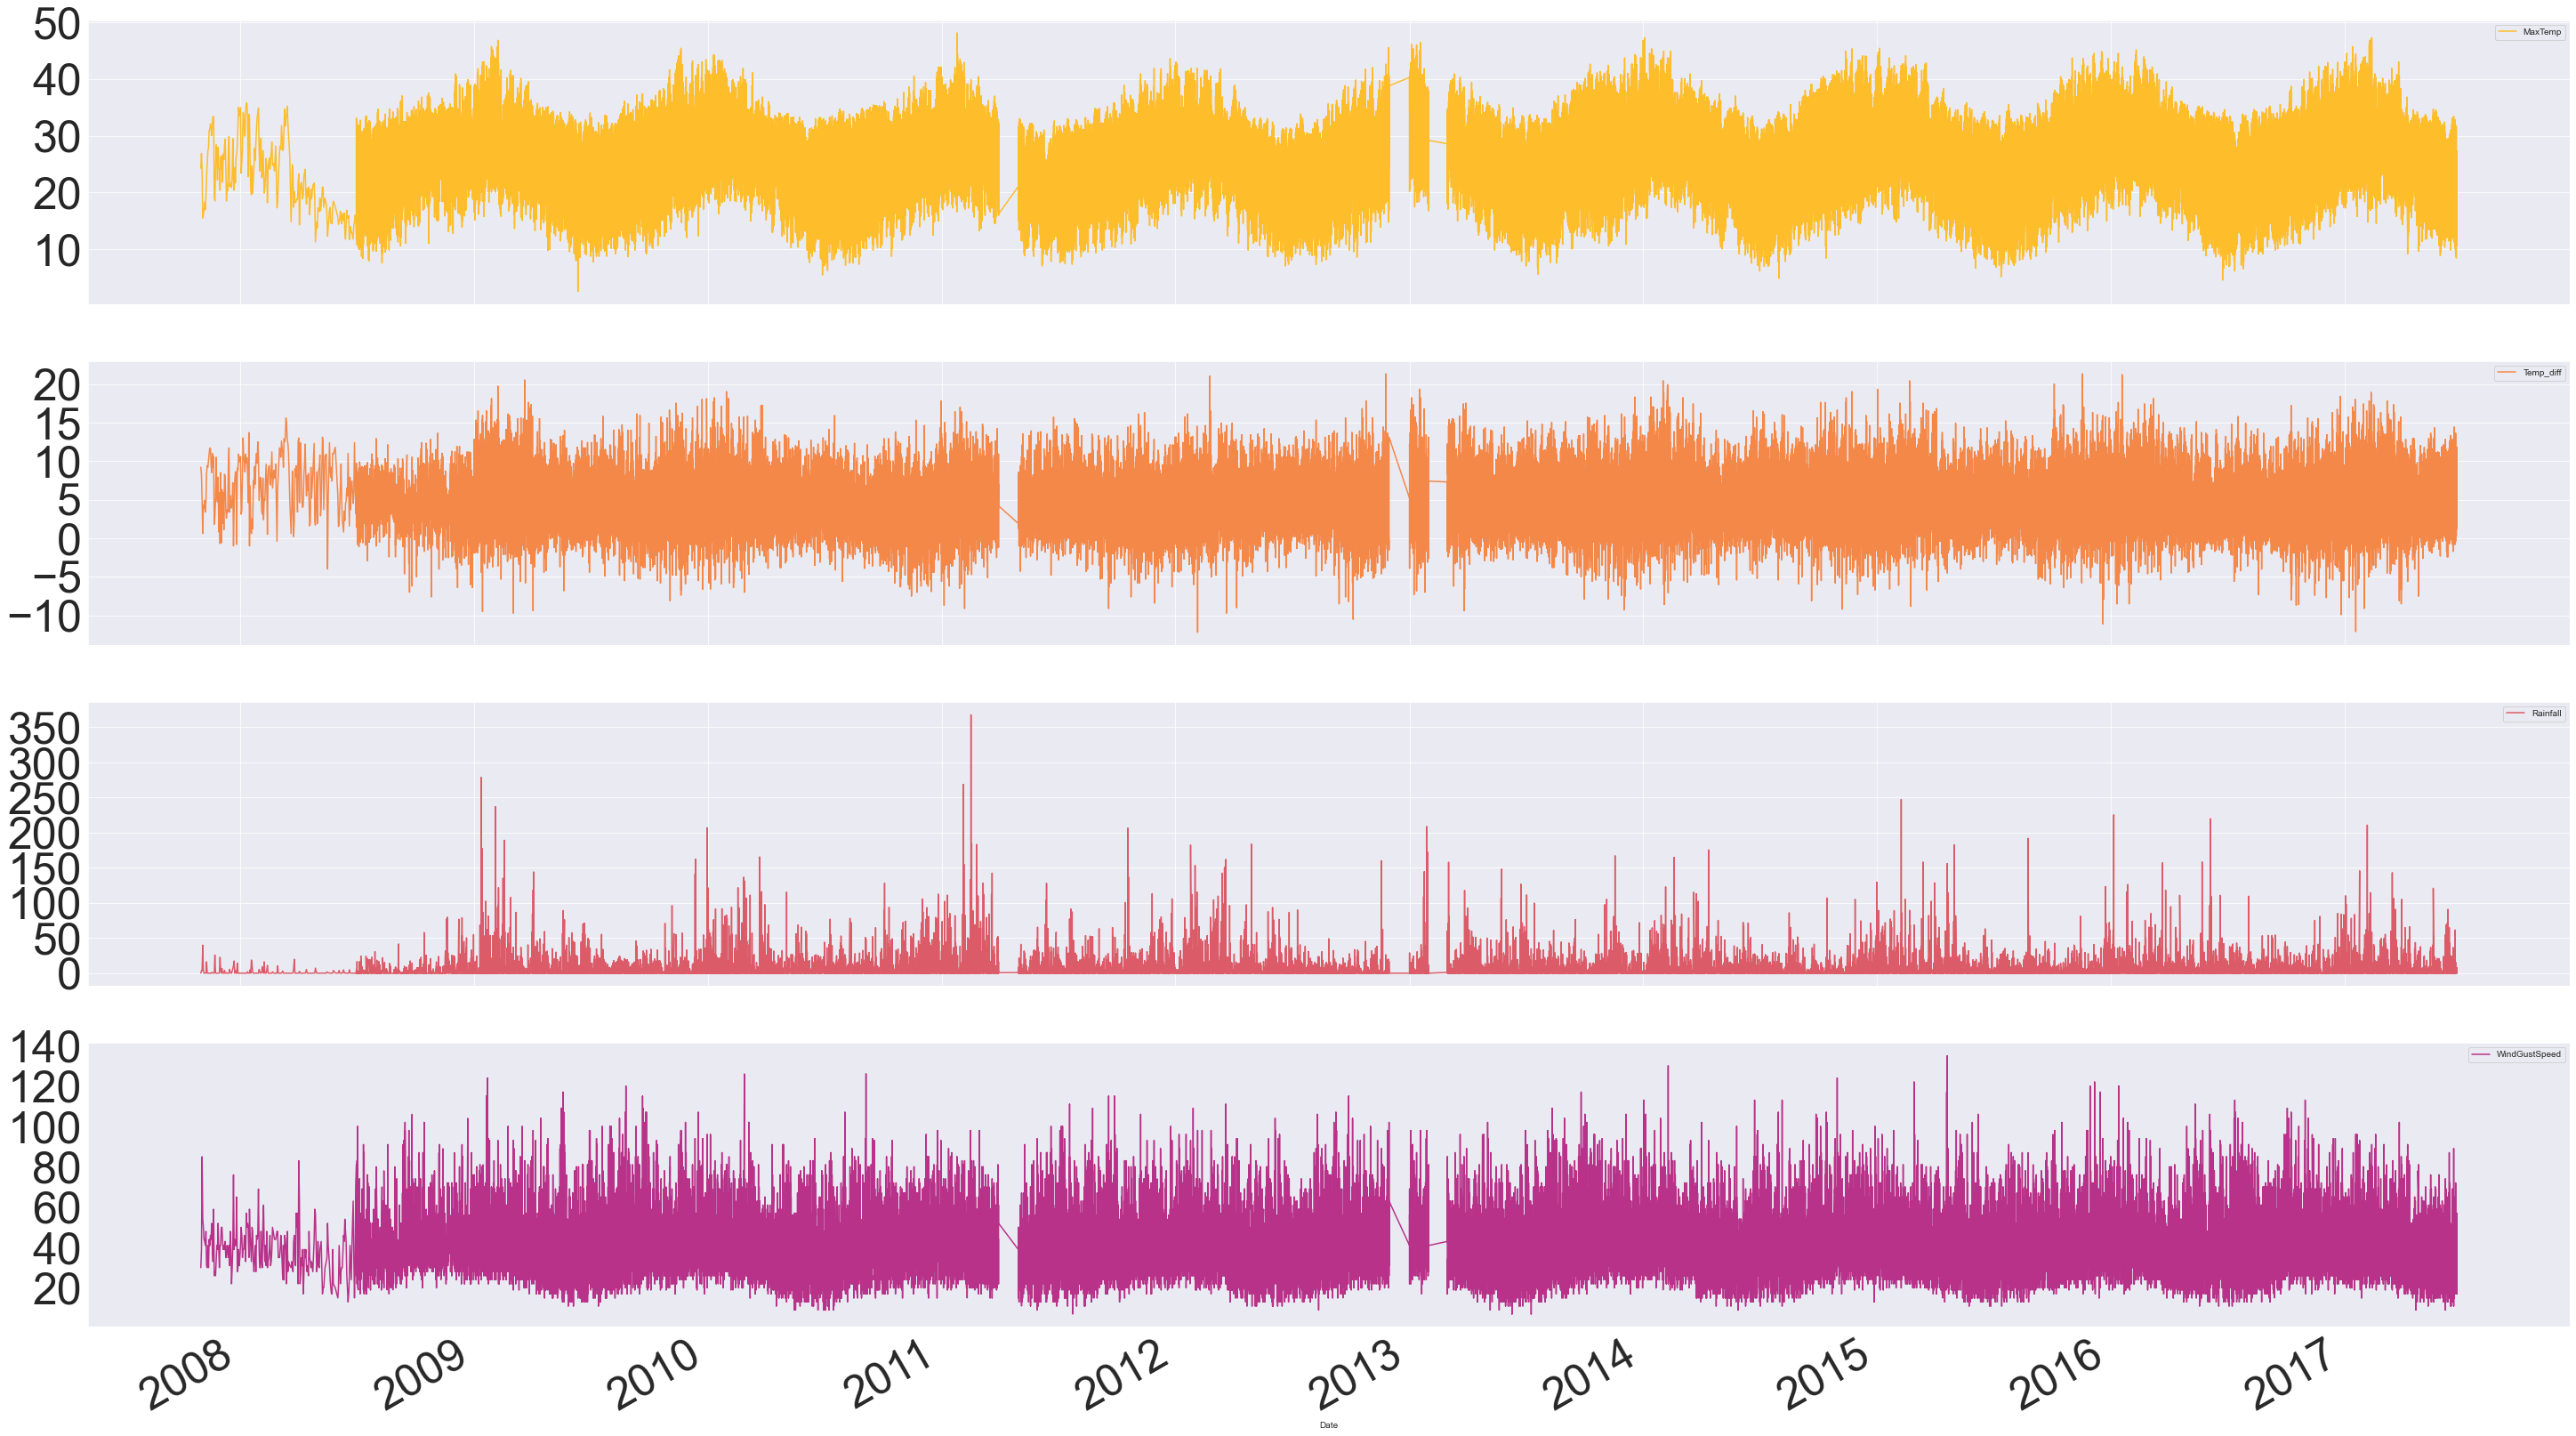

In [119]:
fig = plt.figure()
x = (df[['MaxTemp','Temp_diff','Rainfall','WindGustSpeed']])
x.plot(grid =True, subplots = True,figsize = (50,30), fontsize = 50, legend = 'reverse')
#title = 'How Numerical value changes with respect to time '
#fig.suptitle = 'Temparature vs Rainfall Vs WindGustSpeed'
plt.grid()
plt.show()

Observations:
    From the above chart we are seeing that.
    
1.At the starting and ending of the year varies from 20-45 and in the middle 10-30. 

2.Temperature start to decreases in the middle of the year and then again increasing as starting of the year.

3.Almost 90% difference of temparature between 9am and 3 Pm are positive.Whice means at the later halfof the dat temparature start increasing. That's why we are expecting of heavy rainfall at the end of the day and more frequent rain at the starting of the day.

3.There is a relationship between  Maxtemp and WindGustspeed. in the middle of the year WindGustspeed
Start decresing.Which means The higher temperature is causing for havier WindGustspeed.


As a result Australia has heavy rainfall during starting and ending of the year and more frequent in middle of the year. 

In [120]:
df[['Month', 'MaxTemp', 'Rainfall','WindGustSpeed']].groupby('Month').agg({'MaxTemp':['mean','max'], 'Rainfall':['min','max'], 'WindGustSpeed':['mean','max']})

MaxTemp       Rainfall        WindGustSpeed       
            mean   max      min    max          mean    max
Month                                                      
1      29.800476  48.1      0.0  278.4     43.702382  124.0
2      29.274037  47.3      0.0  367.6     41.971425  130.0
3      27.209355  43.0      0.0  165.2     40.280656  111.0
4      23.925568  39.7      0.0  183.4     37.218277  135.0
5      20.401228  37.0      0.0  182.6     36.995395  117.0
6      17.674326  34.9      0.0  219.6     37.024483  113.0
7      17.149501  35.5      0.0  111.0     39.355725  113.0
8      18.497793  37.0      0.0  192.0     41.195871  120.0
9      21.015306  39.4      0.0   76.2     42.537777  126.0
10     23.754776  42.6      0.0  206.2     42.941304  124.0
11     26.364866  45.5      0.0  166.8     42.655791  120.0
12     27.816868  44.8      0.0  206.8     43.234162  122.0


# WindSpeed:

In [121]:
df['WindSpeed_diff'] = df['WindSpeed3pm'] - df['WindSpeed9am']

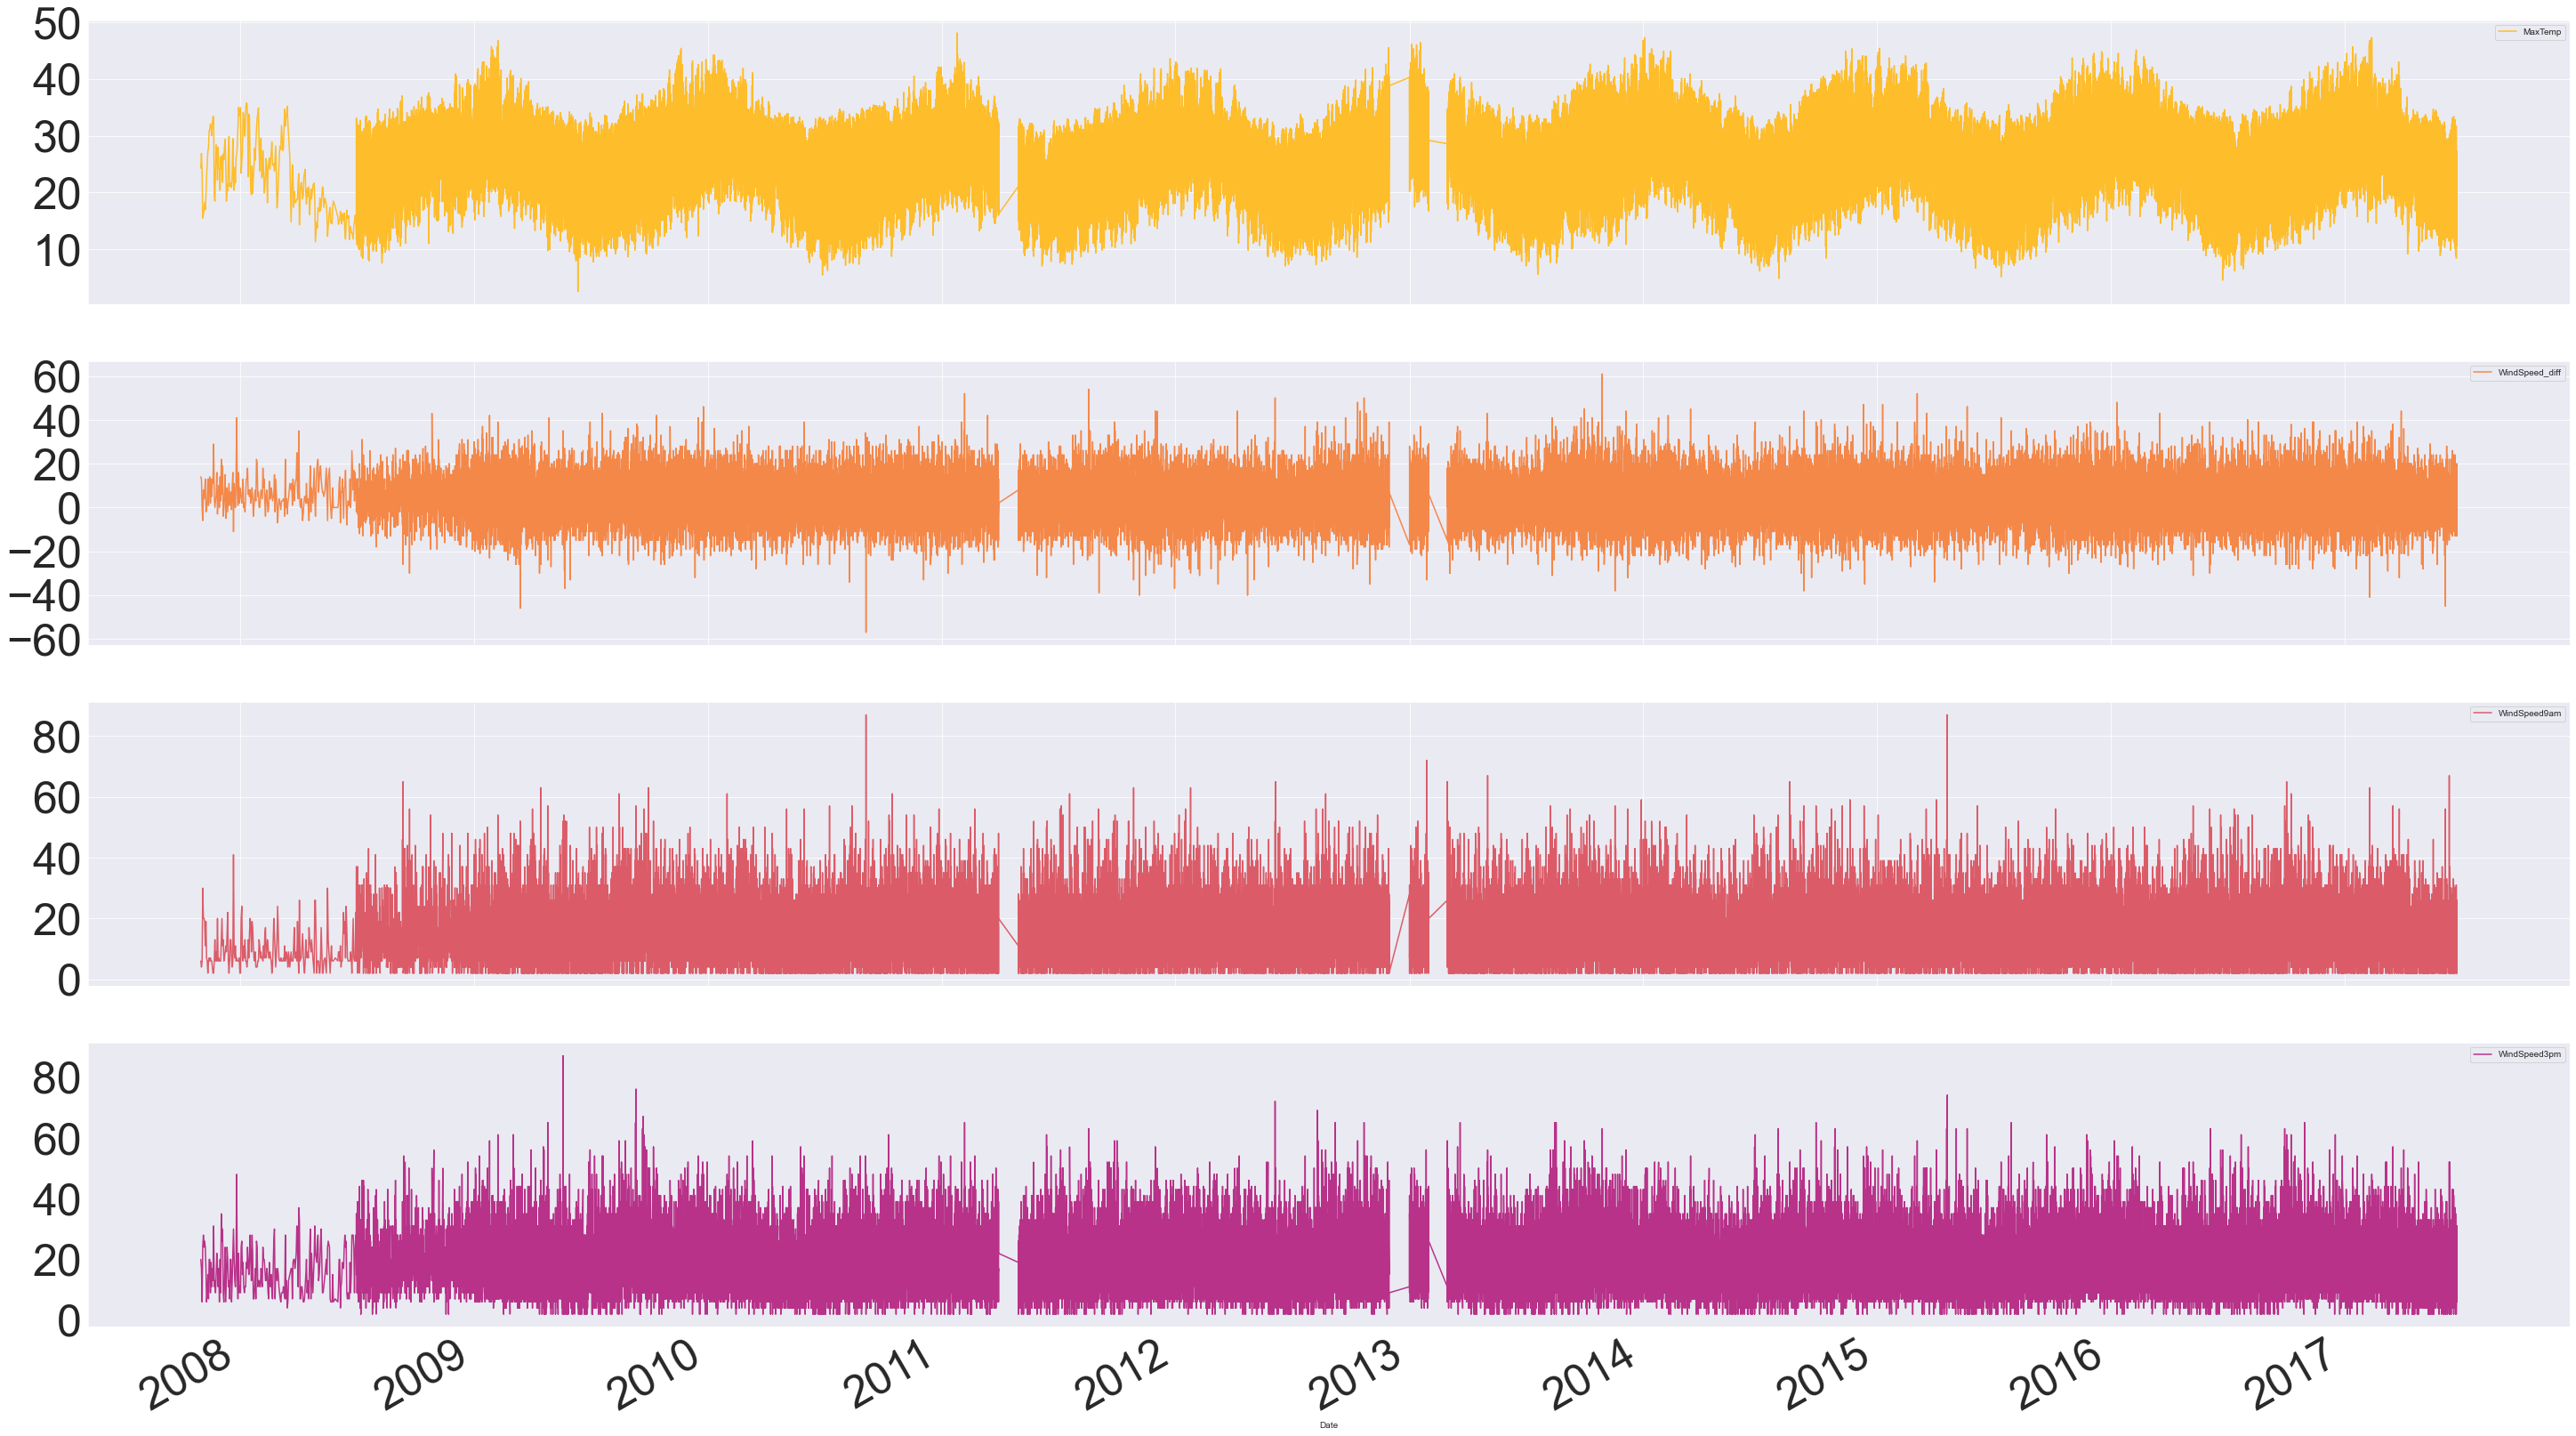

In [122]:
#plt.figure(figsize=[50,300])
x = (df[['MaxTemp','WindSpeed_diff','WindSpeed9am','WindSpeed3pm']])
x.plot(grid =True, subplots = True,figsize = (50,30), fontsize = 50) 
#plt.title = 'How Numerical value changes with respect to time '

plt.grid()
plt.show()

Observations:
    
1.There is no relation between Temp and wind speed.

2. At the end of the day the lower value od wind speed slightly increased.

3.And difference is 50-50 positive and negetive.

So don't think windspeed_diff will be handy and delete it.

In [123]:
df.drop(['WindSpeed_diff'], axis=1, inplace = True)

# Pressure:

In [124]:
df['WindPressure_diff'] = df['Pressure3pm'] - df['Pressure9am']

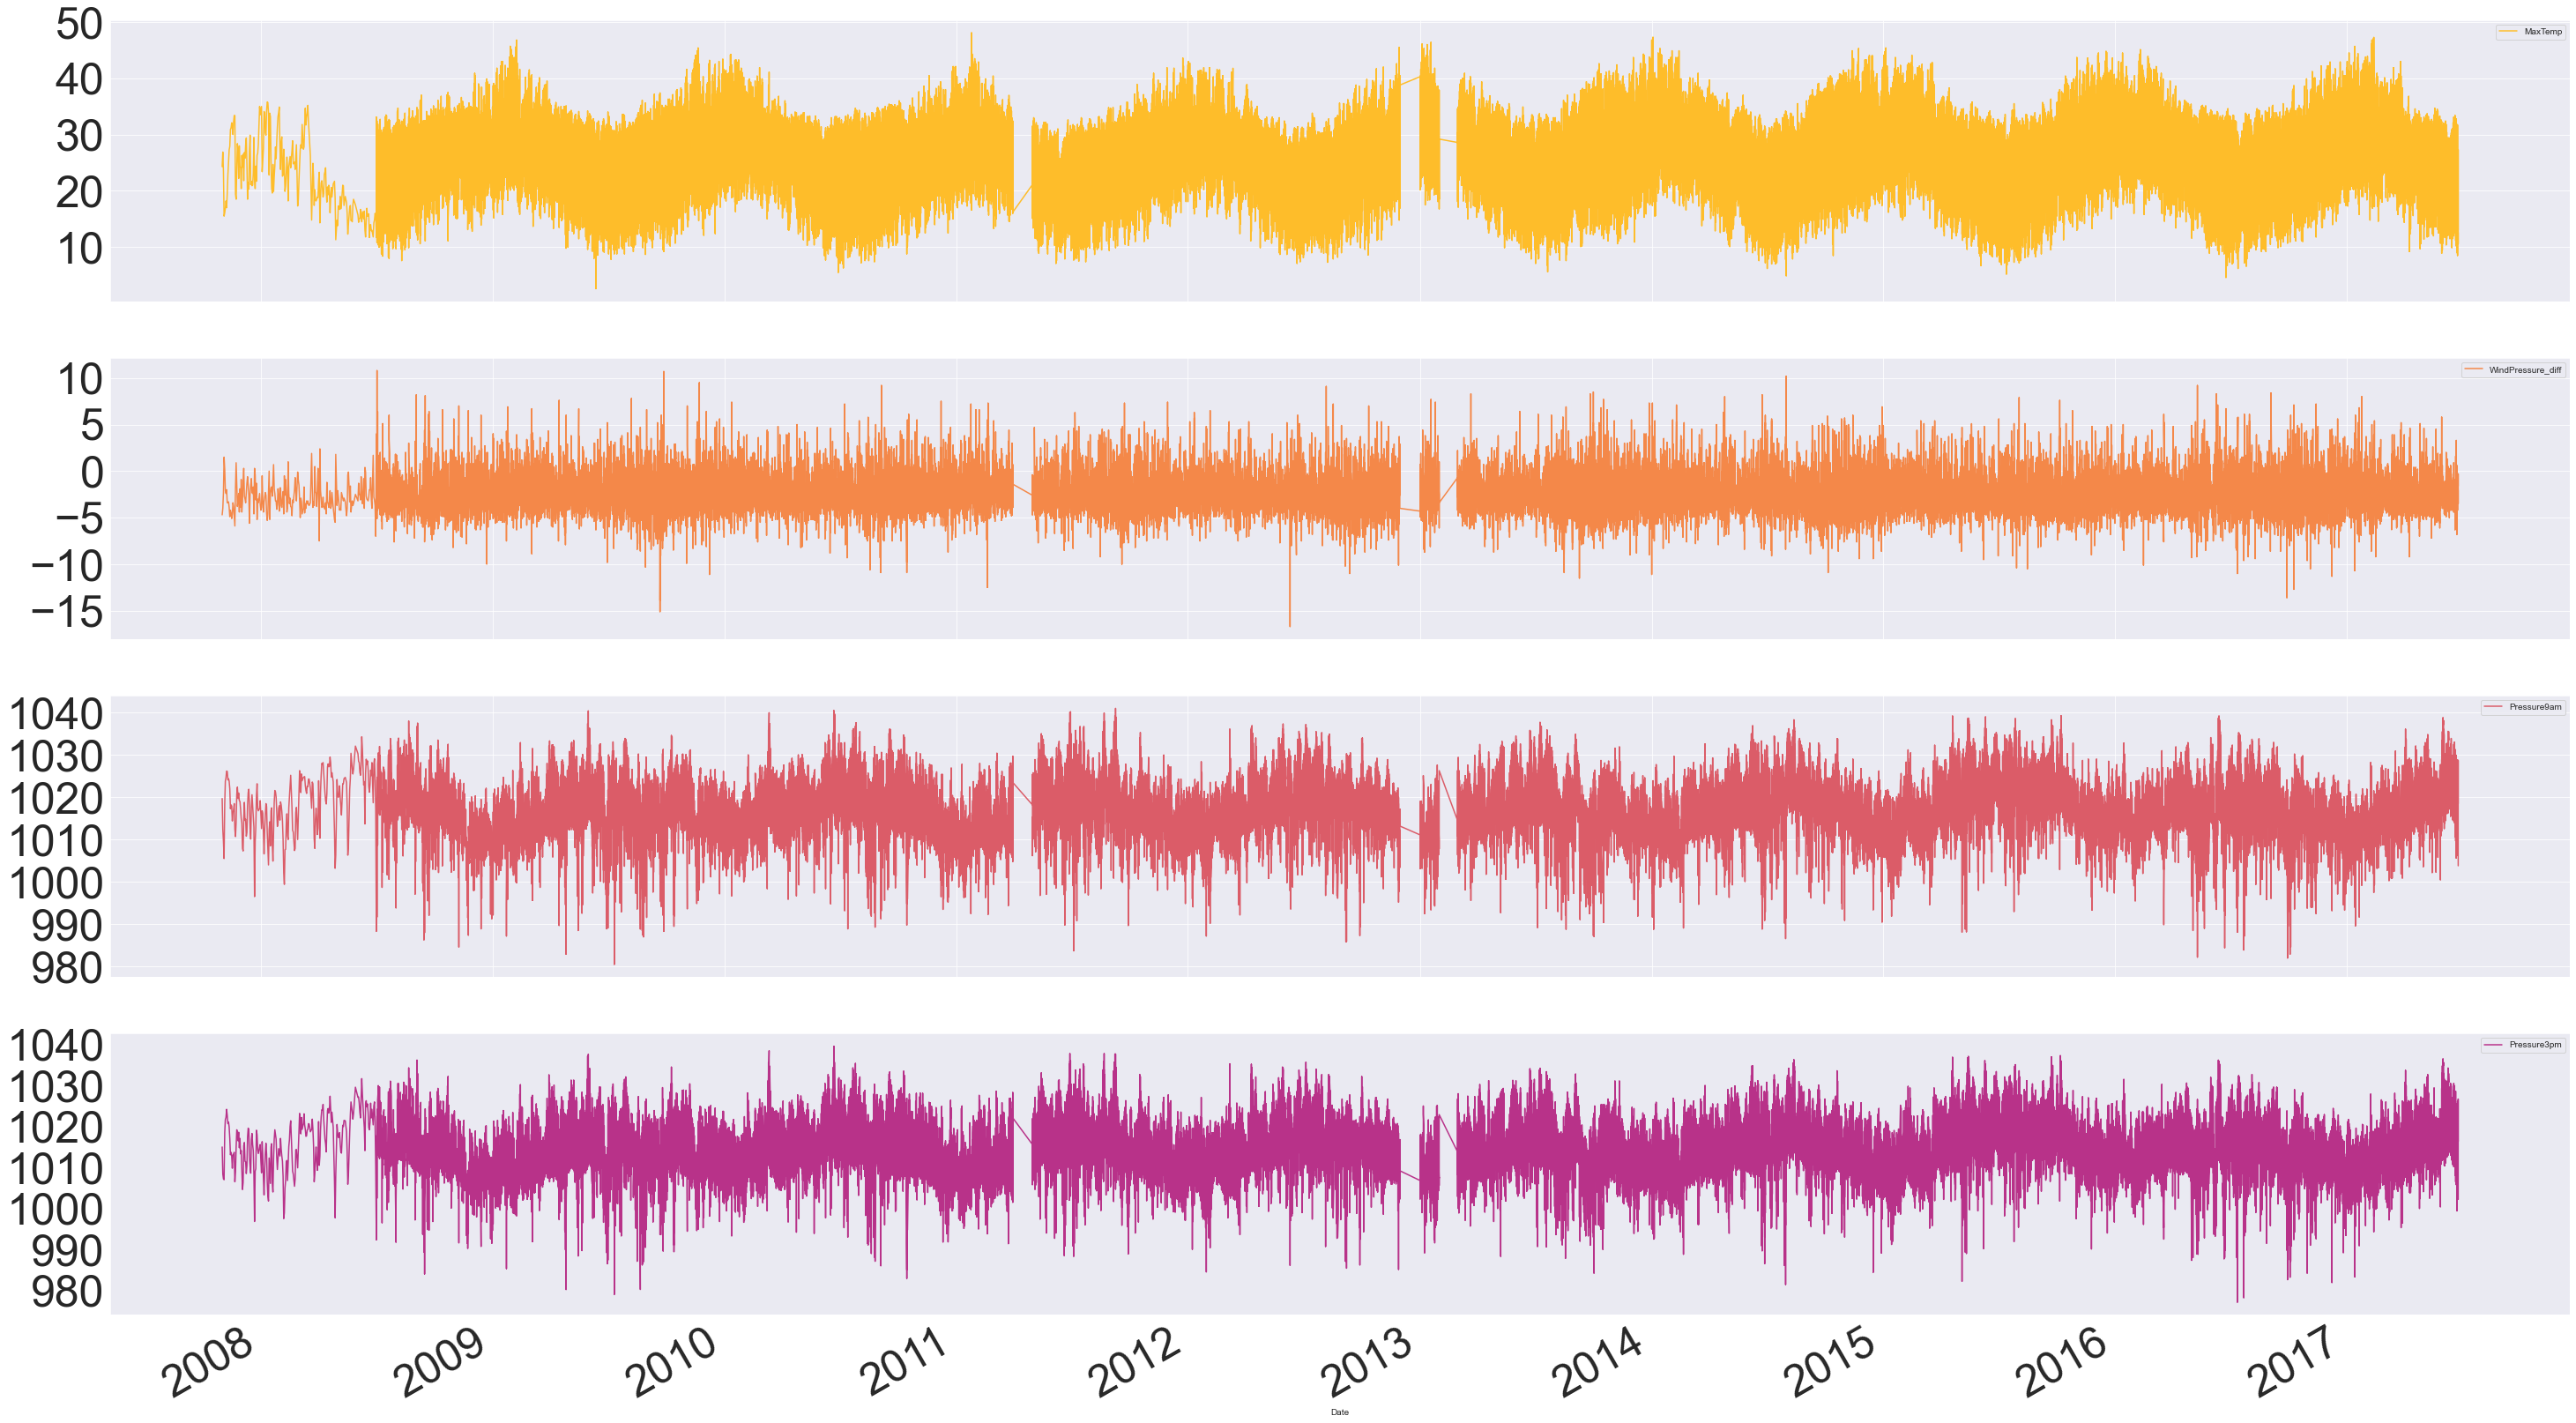

In [125]:
#plt.figure(figsize=[50,300])
x = (df[['MaxTemp','WindPressure_diff','Pressure9am','Pressure3pm']])
x.plot(grid =True, subplots = True,figsize = (50,30), fontsize = 50) 
#plt.title = 'How Numerical value changes with respect to time '

plt.grid()
plt.show()

Observations:
    
I think it need not to be explained.Because it's totally resembling to the fact of law of Temparature. 

In [126]:
df[['Month', 'MaxTemp', 'Pressure9am','Pressure3pm']].groupby('Month').agg({'MaxTemp':['mean','max'], 'Pressure9am':['mean','max'], 'Pressure3pm':['mean','max']})

MaxTemp        Pressure9am          Pressure3pm        
            mean   max         mean     max         mean     max
Month                                                           
1      29.800476  48.1  1012.734722  1032.8  1010.560831  1031.5
2      29.274037  47.3  1014.473838  1032.9  1012.346692  1030.2
3      27.209355  43.0  1016.646259  1040.0  1014.467047  1038.5
4      23.925568  39.7  1019.581400  1039.2  1016.994869  1036.9
5      20.401228  37.0  1020.193635  1040.4  1017.729666  1037.6
6      17.674326  34.9  1020.795038  1040.5  1018.512079  1039.6
7      17.149501  35.5  1020.656387  1038.6  1018.296310  1035.7
8      18.497793  37.0  1019.384815  1039.9  1016.821324  1037.8
9      21.015306  39.4  1018.002171  1041.0  1015.204657  1037.7
10     23.754776  42.6  1018.350175  1039.3  1015.900856  1037.3
11     26.364866  45.5  1015.465138  1031.9  1013.113198  1031.1
12     27.816868  44.8  1013.349821  1029.0  1011.133333  1027.7

# Cloud:

In [127]:
df['Cloud_diff'] = df['Cloud3pm'] - df['Cloud9am']

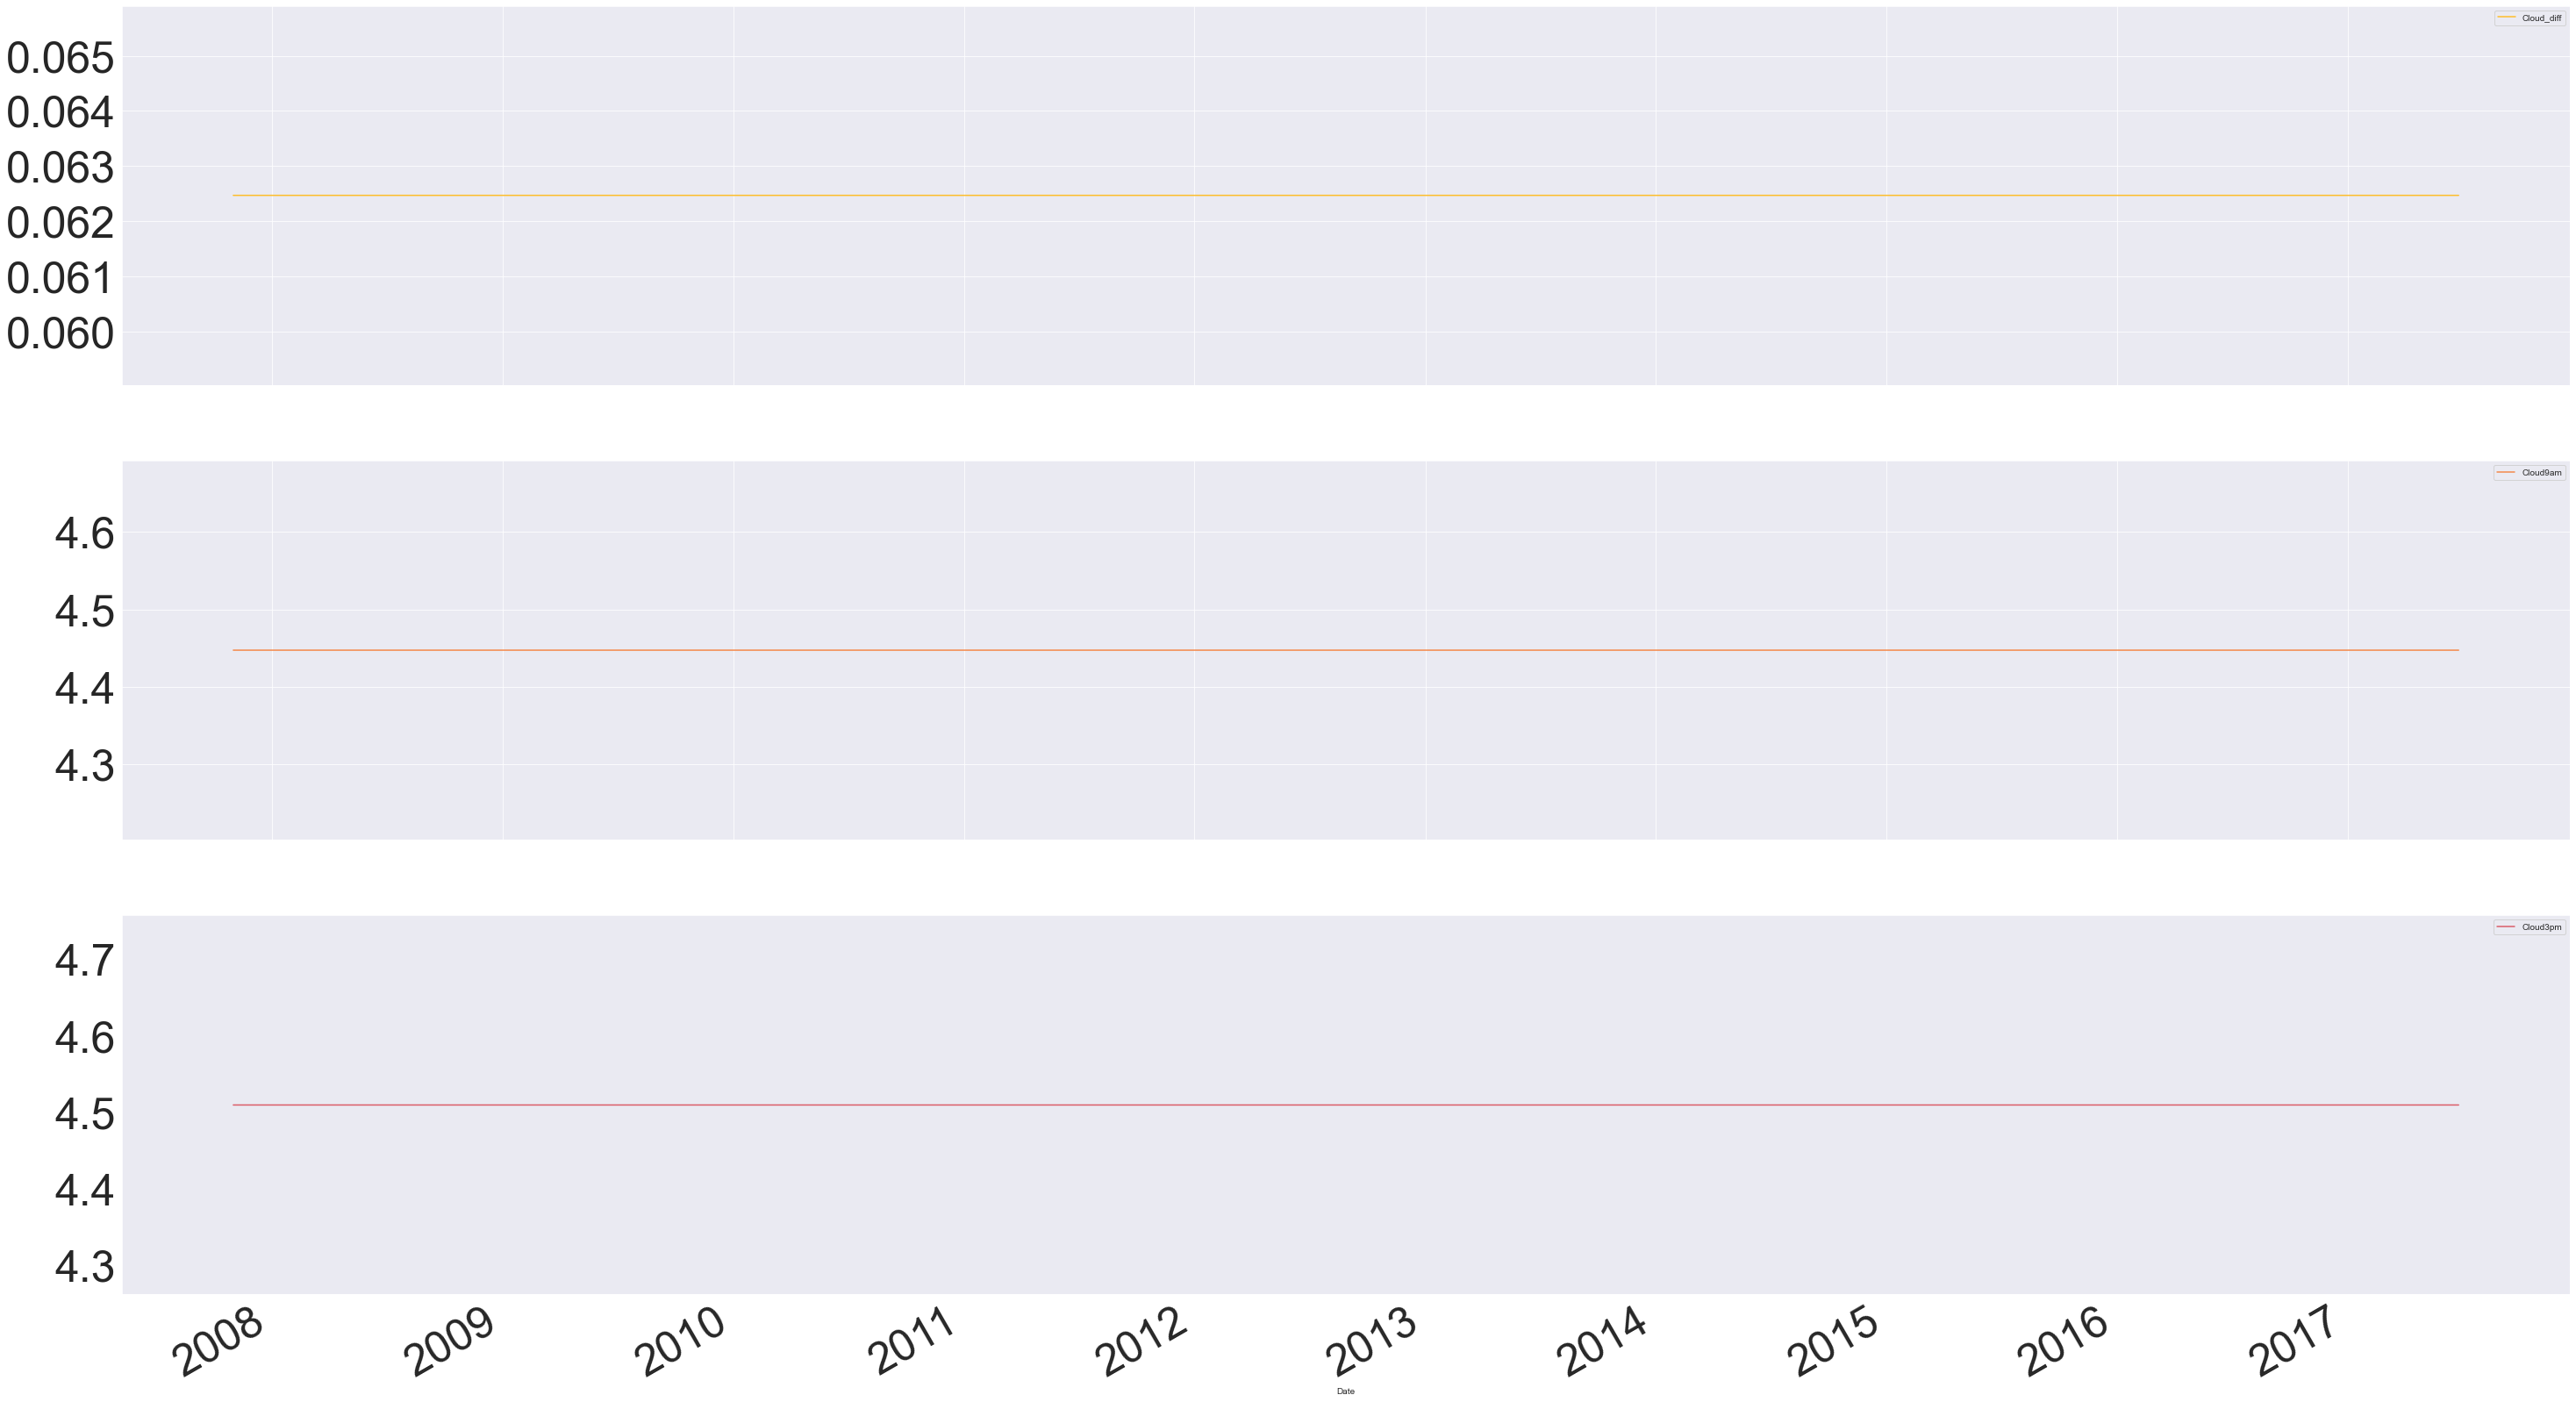

In [128]:
#plt.figure(figsize=[50,300])
x = (df[['Cloud_diff','Cloud9am','Cloud3pm']])
x.plot(grid =True, subplots = True,figsize = (50,30), fontsize = 50) 
plt.title = 'How Numerical value changes with respect to time '

plt.grid()
plt.show()

Observations:

Here we are seeing that The amount of sky covered by cloud is same through out year.At the end of the 
day it slightly increased but remain same.But rain changes throughout the year.
So we can say  that it has almost no effect in rain.

# Humidity:

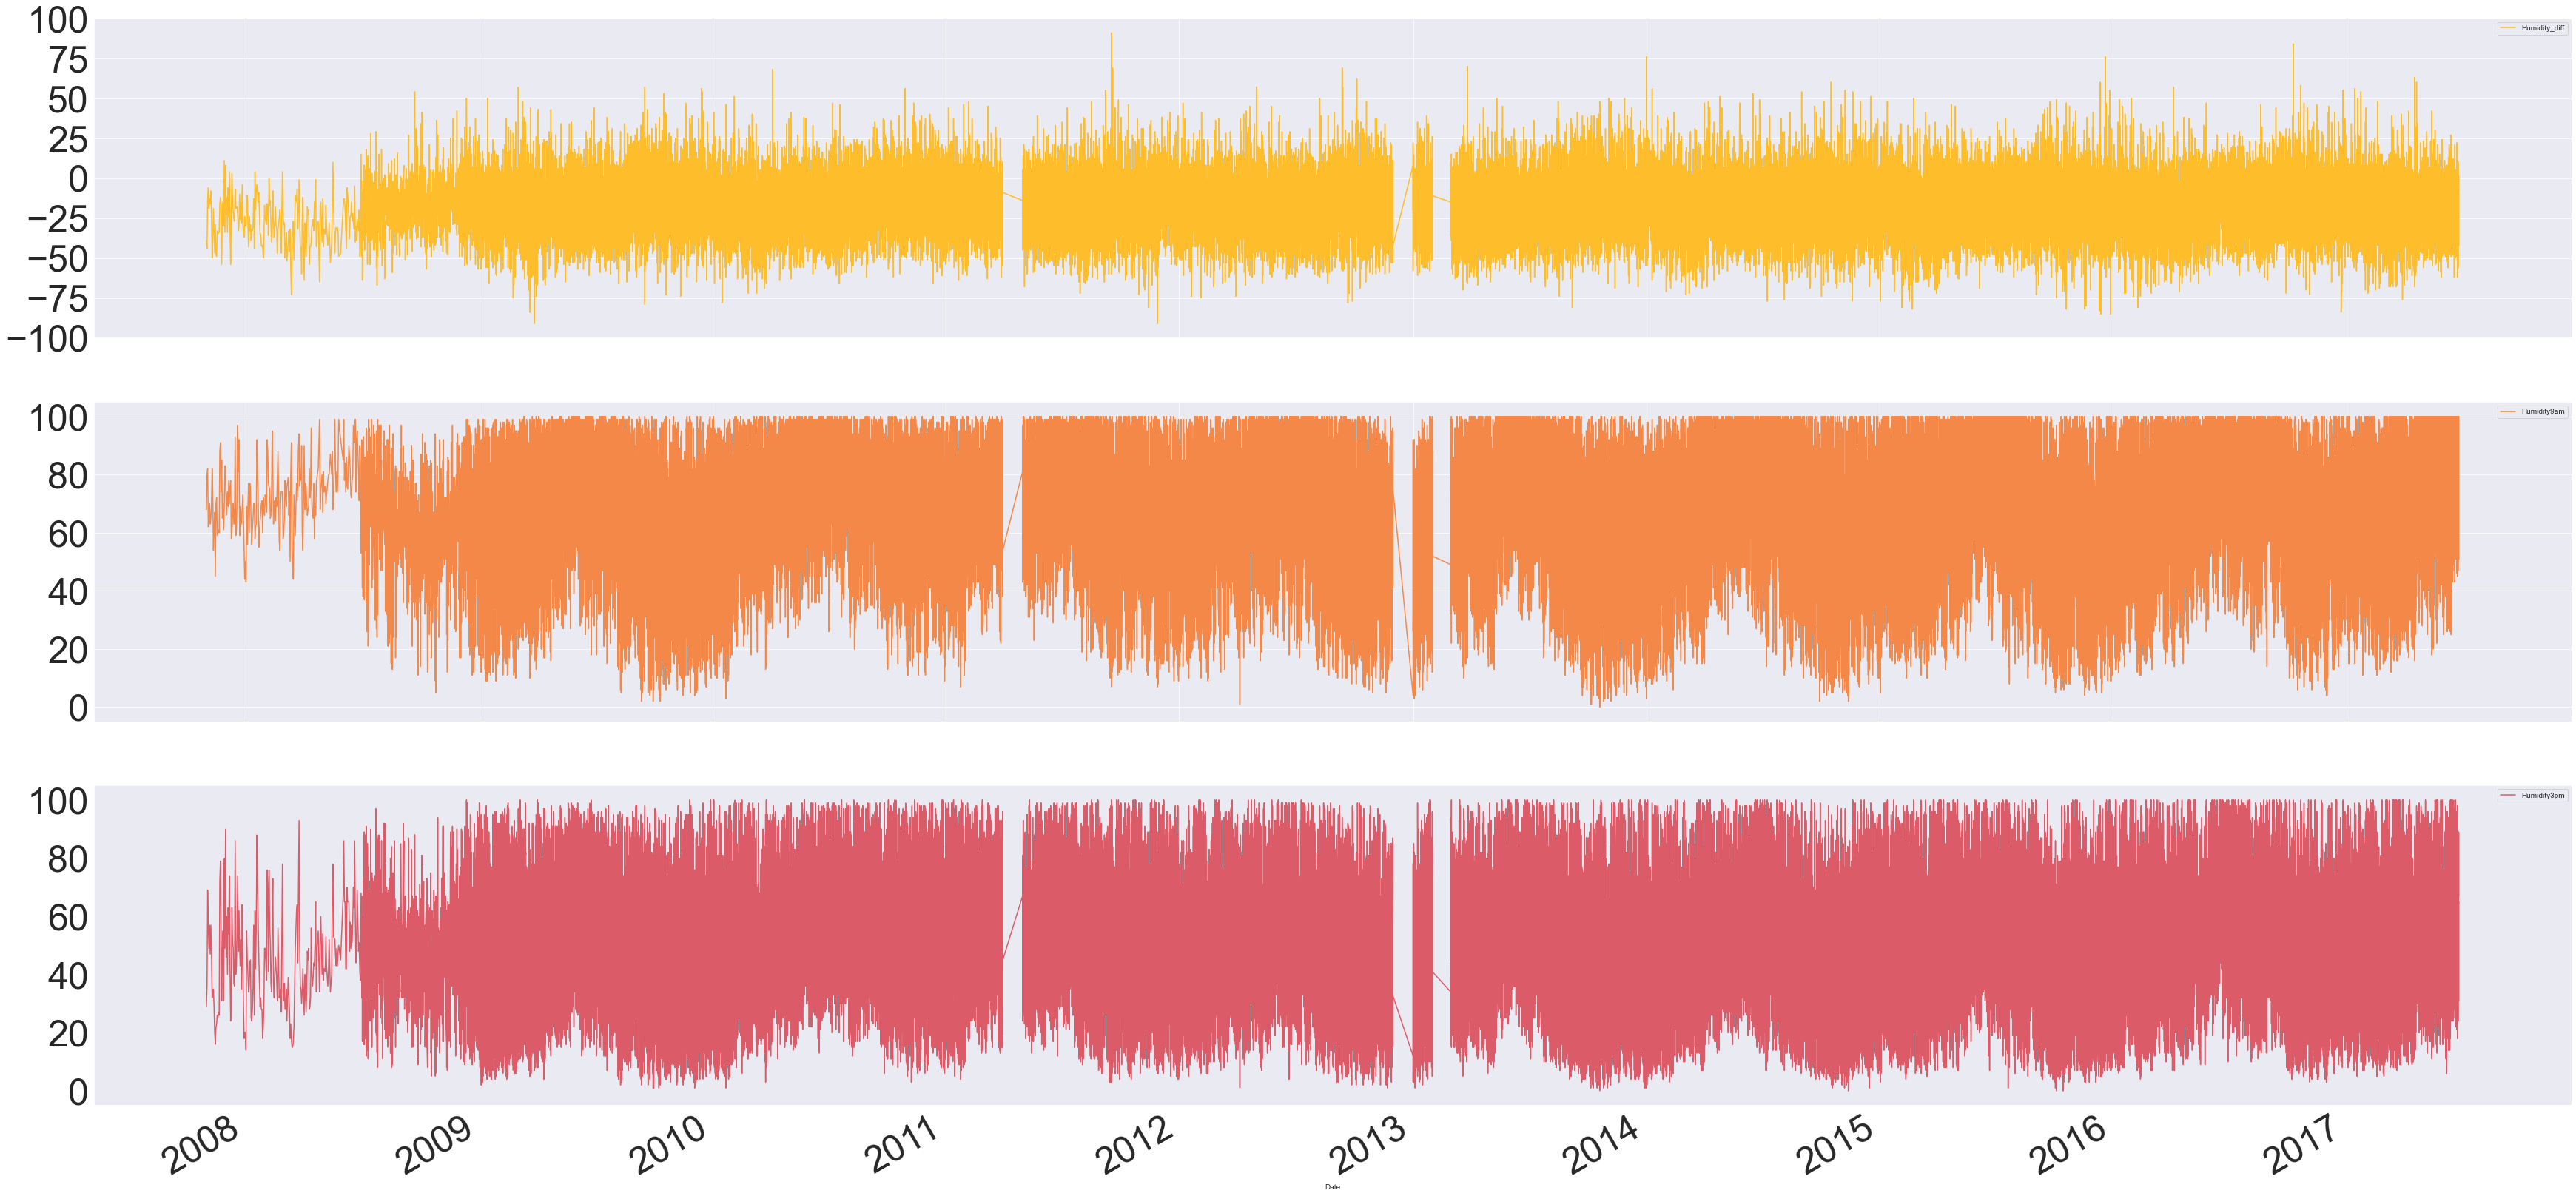

In [129]:
#plt.figure(figsize=[50,300])
df['Humidity_diff'] = df['Humidity3pm'] - df['Humidity9am']
x = (df[['Humidity_diff','Humidity9am','Humidity3pm']])
x.plot(grid =True, subplots = True,figsize = (60,30), fontsize = 50) 
#plt.title = 'How Numerical value changes with respect to time '

plt.grid()
plt.show()

Obsevations:

It's slightly simmiliar to the Temperature and at the middle of the year humidity increases little bit.

In [130]:
df[['Month', 'Humidity9am','Humidity3pm']].groupby('Month').agg({ 'Humidity9am':['mean','max'], 'Humidity3pm':['mean','max']})

Humidity9am        Humidity3pm       
             mean    max        mean    max
Month                                      
1       61.160953  100.0   45.633909  100.0
2       65.667408  100.0   47.881368  100.0
3       69.325432  100.0   49.549215  100.0
4       69.398264  100.0   51.424421  100.0
5       72.923762  100.0   54.357348  100.0
6       77.963384  100.0   59.883761  100.0
7       75.844903  100.0   57.419311  100.0
8       70.233122  100.0   52.516605  100.0
9       64.042010  100.0   49.862353  100.0
10      61.782133  100.0   46.837941  100.0
11      60.959715  100.0   47.099245  100.0
12      60.507164  100.0   46.503918  100.0

It's time to explore the categorical variable.

# Location

In [131]:
print('Location contains', len(df['Location'].unique()), 'labels')

Location contains 44 labels


In [132]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland',
       'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast',
       'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
       'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'Walpole',
       'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine',
       'Uluru'], dtype=object)

In [133]:
df.Location.value_counts()

Darwin              3117
Hobart              3089
Perth               3037
Brisbane            3020
MelbourneAirport    2934
SydneyAirport       2929
PerthAirport        2923
Cairns              2899
Mildura             2897
MountGambier        2886
Woomera             2886
Townsville          2884
NorfolkIsland       2864
Ballarat            2854
GoldCoast           2821
Portland            2820
Cobar               2804
WaggaWagga          2800
Nuriootpa           2790
NorahHead           2785
Wollongong          2767
AliceSprings        2744
Adelaide            2740
Watsonia            2735
Sale                2735
Canberra            2725
Bendigo             2713
Moree               2629
CoffsHarbour        2529
Walpole             2502
PearceRAAF          2458
Albury              2440
BadgerysCreek       2334
Witchcliffe         2318
Tuggeranong         2316
Dartmoor            2294
Sydney              2259
Melbourne           2233
Williamtown         2195
Richmond            2048


# WindGustDir:

In [134]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 16 labels


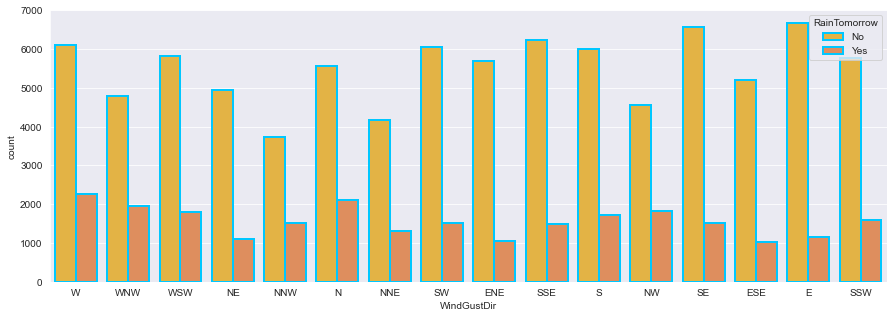

In [135]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'WindGustDir', hue = 'RainTomorrow', data = df,
             edgecolor=(0,.78,1), linewidth = 2)

# WindDir9am:

In [136]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 16 labels


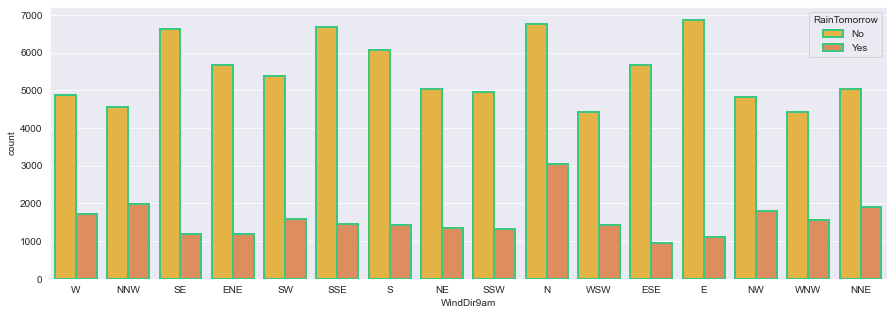

In [137]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'WindDir9am', hue = 'RainTomorrow', data = df,
             edgecolor=(.23,.78,.5), linewidth = 2)

# WindDir3pm:

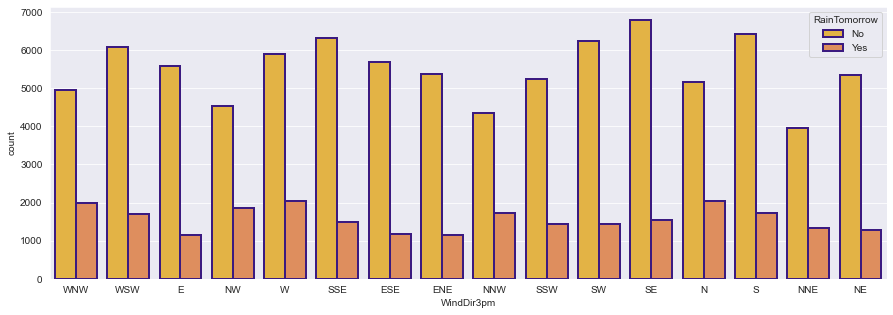

In [138]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'WindDir3pm', hue = 'RainTomorrow', data = df,
             edgecolor=(.23,.1,.5), linewidth = 2)

# RainToday:

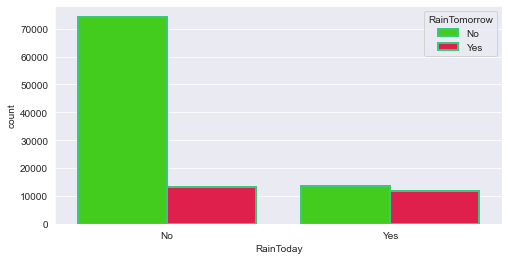

In [139]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = df,
             edgecolor=(.23,.78,.5), linewidth = 2, palette="prism")

Here a importent point to notice is One can say  with 95% confident that tomorrow is going to rain, if today rain does occurs.

It's time to see the correlation among the features.

We are expecting of relationship between all the simillar types of columns like, maxTemp, minTemp, Pressure 9am and 3pm, Humidity at 9 am and 3 Pm.....

There can be a positive relationship between Temp and WindGustspeed, and Temp and Humidity.

And a negetive relationship between  Temp and Pressure.

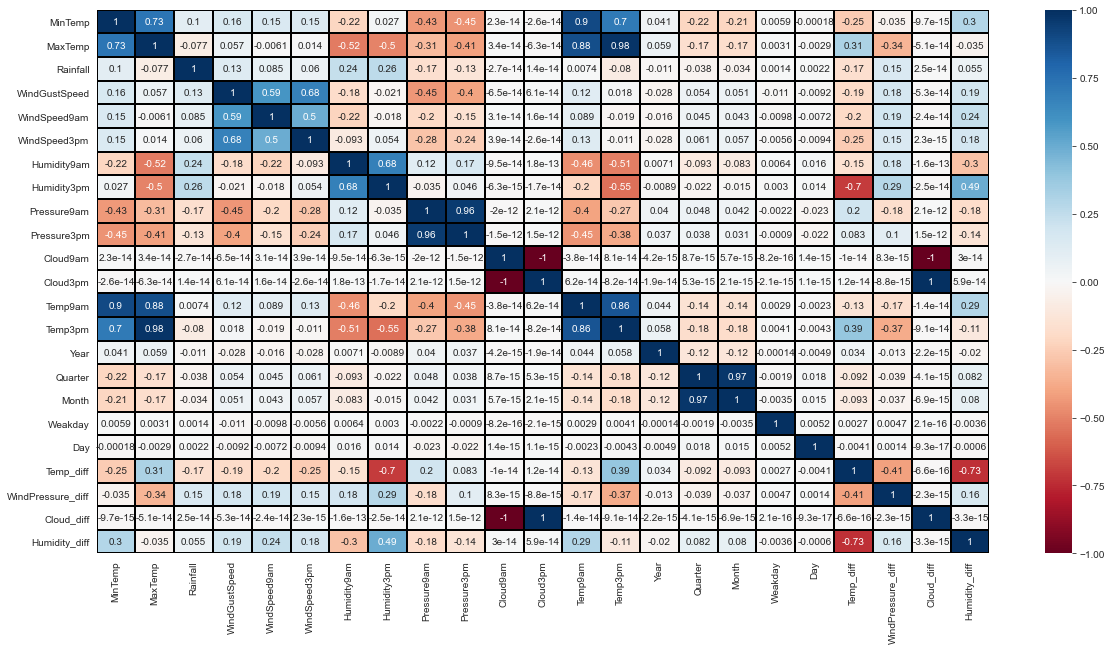

In [140]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap = 'RdBu', annot = True, linewidths=1, linecolor='black')

My assumptions are come to truth.

Column that are positively related with Temperature are negetively related with Pressure.

And there is a strong relation between features of same types.

# Outlier removal:

In [141]:
print(round(df[numerical].describe()))

        MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
count  112925.0  112925.0  112925.0       112925.0      112925.0   
mean       13.0      24.0       2.0           41.0          15.0   
std         6.0       7.0       9.0           13.0           8.0   
min        -8.0       3.0       0.0            7.0           2.0   
25%         8.0      18.0       0.0           31.0           9.0   
50%        12.0      23.0       0.0           39.0          13.0   
75%        17.0      29.0       1.0           48.0          20.0   
max        34.0      48.0     368.0          135.0          87.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count      112925.0     112925.0     112925.0     112925.0     112925.0   
mean           20.0         67.0         51.0       1017.0       1015.0   
std             9.0         19.0         21.0          7.0          7.0   
min             2.0          0.0          0.0        980.0        977.0   
25%         

On closer inspection, we can see that the Rainfall,WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'Humidity3pm')

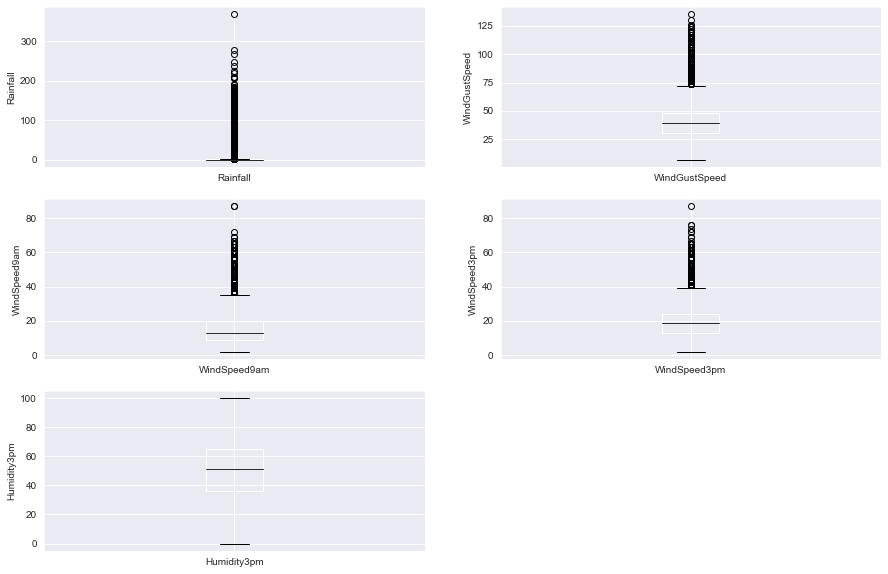

In [142]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(3, 2, 2)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


plt.subplot(3, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(3, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(3, 2, 5)
fig = df.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')


In [143]:
column = ['Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm']

In [144]:
def Outlier_detection(df, column):
    for i in column:
        IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
        l_b = df[i].quantile(0.25) - (IQR * 3)
        u_b = df[i].quantile(0.75) + (IQR * 3)
        
        med = np.median(df[i])
        
        df[i] = np.where(df[i] > u_b , med,
                         np.where(df[i] < l_b, med, df[i]))

In [145]:
Outlier_detection(df, column)

In [146]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Year,Quarter,Month,Weakday,Day,Temp_diff,WindPressure_diff,Cloud_diff,Humidity_diff
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,...,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,1.129250e+05,112925.000000
mean,12.664721,23.655670,0.216928,40.705884,15.133655,19.473137,67.404162,50.669055,1017.425847,1015.048962,...,22.127306,2012.753385,2.479150,6.431499,2.976028,15.714678,4.665298,-2.376886,6.246882e-02,-16.735107
std,6.254135,6.982702,0.585774,13.124029,8.230475,8.509875,18.911610,20.768550,7.032654,6.957822,...,6.837380,2.530203,1.127252,3.476314,2.002615,8.790323,3.522350,1.973810,3.287662e-14,15.855079
min,-8.200000,2.600000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,...,1.700000,2007.000000,1.000000,1.000000,0.000000,1.000000,-12.200000,-16.700000,6.246882e-02,-91.000000
25%,8.100000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,...,16.900000,2011.000000,1.000000,3.000000,1.000000,8.000000,2.100000,-3.700000,6.246882e-02,-27.000000
50%,12.400000,23.100000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,...,21.600000,2013.000000,2.000000,6.000000,3.000000,16.000000,4.300000,-2.600000,6.246882e-02,-16.000000
75%,17.200000,28.700000,0.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,...,26.900000,2015.000000,3.000000,9.000000,5.000000,23.000000,7.100000,-1.300000,6.246882e-02,-6.000000
max,33.900000,48.100000,3.200000,98.000000,52.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,...,46.700000,2017.000000,4.000000,12.000000,6.000000,31.000000,21.300000,10.800000,6.246882e-02,91.000000


# Encoding:

In [147]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Year', 'Quarter', 'Month', 'Weakday',
       'Day', 'Temp_diff', 'WindPressure_diff', 'Cloud_diff', 'Humidity_diff'],
      dtype='object')

Here WeakDay, cloud_diff columns are notnecessary. So let's delete those.


In [148]:
df.drop(['Weakday', 'Cloud_diff'], axis = 1, inplace = True)

In [149]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Temp3pm,RainToday,RainTomorrow,Year,Quarter,Month,Day,Temp_diff,WindPressure_diff,Humidity_diff
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,21.8,No,No,2008,4,12,1,4.9,-0.6,-49.0
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,24.3,No,No,2008,4,12,2,7.1,-2.8,-19.0
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,23.2,No,No,2008,4,12,3,2.2,1.1,-8.0
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,26.5,No,No,2008,4,12,4,8.4,-4.8,-29.0
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,29.7,No,No,2008,4,12,5,11.9,-4.8,-49.0


In [150]:
cols = ['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday']


In [151]:
le = LabelEncoder()
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [152]:
df['RainTomorrow'].unique()

array([0, 1])

In [153]:
df = pd.get_dummies(df,
                    columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'],

                    drop_first=True)

Let's make the train test split

In [154]:
X = df.drop(['RainTomorrow'], axis = 1)

In [155]:
y = df['RainTomorrow']

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [158]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-27,13.6,34.4,0.0,48.0,30.0,20.0,9.0,9.0,1015.2,1010.8,...,0,0,1,0,0,0,0,0,0,0
2016-05-04,24.2,32.1,0.0,35.0,17.0,22.0,80.0,89.0,1012.9,1009.5,...,0,0,1,0,0,0,0,0,0,1
2015-12-07,18.7,28.8,0.0,31.0,28.0,24.0,56.0,62.0,1020.2,1018.6,...,0,0,0,0,0,0,0,0,0,0
2012-01-14,12.2,20.3,0.0,39.0,11.0,19.0,63.0,55.0,1022.5,1021.5,...,0,0,0,1,0,0,0,0,0,0
2014-11-15,20.2,27.0,0.0,35.0,2.0,22.0,50.0,37.0,1008.4,1009.1,...,0,0,0,0,0,0,1,0,0,0


# Modeling

In [159]:
model = []
precision = []
recall = []
F1score = []
Accuracy = []
AUCROC = []

# LogisticRegression:

In [160]:
Log = LogisticRegression(C  = 10)

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


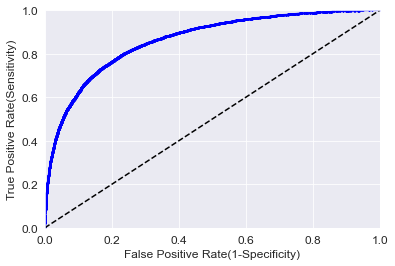

Confusion Matrix
[[24918  1334]
 [ 3894  3732]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     26252
           1       0.74      0.49      0.59      7626

    accuracy                           0.85     33878
   macro avg       0.80      0.72      0.75     33878
weighted avg       0.84      0.85      0.83     33878
 

AUC-ROC
0.864232041926225
Accuracy Score
0.8456815632563905


In [161]:
Log.fit(X_train, y_train)

y_prob=Log.predict_proba(X_test)[:,1]
y_pred=Log.predict(X_test)

fpr, tpr, thresholds  = roc_curve(y_test, y_prob)

plt.rcParams['font.size'] = 12
plt.plot(fpr, tpr, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1)
plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)
plt.show()

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred),"\n")
print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob))
print('Accuracy Score')
print('='*60)
print(accuracy_score(y_test, y_pred))
          
model.append('Logistic REgression')
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
F1score.append(f1_score(y_test,y_pred))
Accuracy.append(accuracy_score(y_test, y_pred))
AUCROC.append(roc_auc_score(y_test, y_prob))


# Naive Bayes CLassifier: 

## GaussianNB:

In [162]:
from sklearn.naive_bayes import GaussianNB
Naive_bayes= GaussianNB()

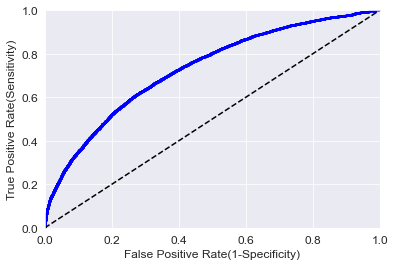

Confusion Matrix
[[16155 10097]
 [ 2168  5458]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.62      0.72     26252
           1       0.35      0.72      0.47      7626

    accuracy                           0.64     33878
   macro avg       0.62      0.67      0.60     33878
weighted avg       0.76      0.64      0.67     33878
 

AUC-ROC
0.7318726211271342
Accuracy Score
0.6379656414192101


In [163]:
Naive_bayes.fit(X_train, y_train)

y_prob=Naive_bayes.predict_proba(X_test)[:,1]
y_pred=Naive_bayes.predict(X_test)

fpr, tpr, thresholds  = roc_curve(y_test, y_prob)

plt.rcParams['font.size'] = 12
plt.plot(fpr, tpr, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1)
plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)
plt.show()

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred),"\n")
print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob))
print('Accuracy Score')
print('='*60)
print(accuracy_score(y_test, y_pred))
          
model.append('GaussianNB')
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
F1score.append(f1_score(y_test,y_pred))
Accuracy.append(accuracy_score(y_test, y_pred))
AUCROC.append(roc_auc_score(y_test, y_prob))


## MultinomialNB

In [164]:
from sklearn.naive_bayes import BernoulliNB
Bernoulli= BernoulliNB()

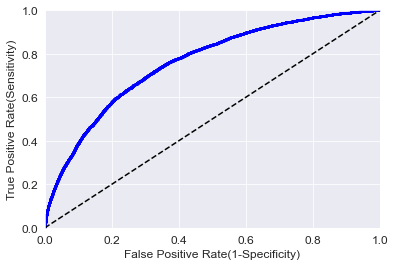

Confusion Matrix
[[23781  2471]
 [ 4760  2866]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     26252
           1       0.54      0.38      0.44      7626

    accuracy                           0.79     33878
   macro avg       0.69      0.64      0.66     33878
weighted avg       0.77      0.79      0.77     33878
 

AUC-ROC
0.7634632280985852
Accuracy Score
0.7865576480311707


In [165]:
Bernoulli.fit(X_train, y_train)

y_prob=Bernoulli.predict_proba(X_test)[:,1]
y_pred=Bernoulli.predict(X_test)

fpr, tpr, thresholds  = roc_curve(y_test, y_prob)

plt.rcParams['font.size'] = 12
plt.plot(fpr, tpr, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1)
plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)
plt.show()

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred),"\n")
print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob))
print('Accuracy Score')
print('='*60)
print(accuracy_score(y_test, y_pred))
          
model.append('BernoulliNB')
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
F1score.append(f1_score(y_test,y_pred))
Accuracy.append(accuracy_score(y_test, y_pred))
AUCROC.append(roc_auc_score(y_test, y_prob))


In [166]:
model

['Logistic REgression', 'GaussianNB', 'BernoulliNB']

# Support Vector:

In [169]:
RandomForest = RandomForestClassifier()

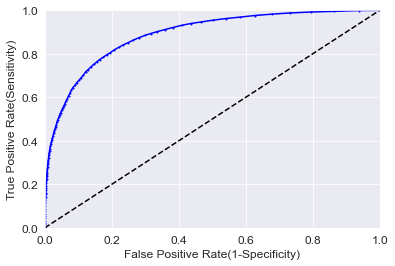

Confusion Matrix
[[25228  1024]
 [ 3831  3795]] 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     26252
           1       0.79      0.50      0.61      7626

    accuracy                           0.86     33878
   macro avg       0.83      0.73      0.76     33878
weighted avg       0.85      0.86      0.84     33878
 

AUC-ROC
0.8884192465857458
Accuracy Score
0.8566916583033237


In [170]:
RandomForest.fit(X_train, y_train)

y_prob=RandomForest.predict_proba(X_test)[:,1]
y_pred=RandomForest.predict(X_test)

fpr, tpr, thresholds  = roc_curve(y_test, y_prob)

plt.rcParams['font.size'] = 12
plt.plot(fpr, tpr, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1)
plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)
plt.show()

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred),"\n")
print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob))
print('Accuracy Score')
print('='*60)
print(accuracy_score(y_test, y_pred))
          
model.append('RandomForest')
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
F1score.append(f1_score(y_test,y_pred))
Accuracy.append(accuracy_score(y_test, y_pred))
AUCROC.append(roc_auc_score(y_test, y_prob))


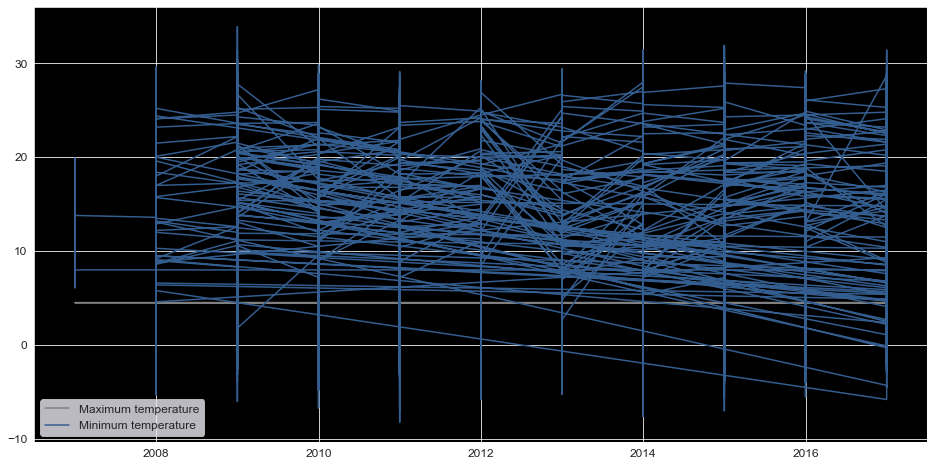

In [167]:
fig, ax = plt.subplots(figsize = (16,8))
ax.set_facecolor('xkcd:black')

plt.plot(df['Year'],
        df['Cloud3pm'].rolling(window = 500, min_periods=1).mean(),
        color = 'gray',
        label = 'Maximum temperature')
#plt.grid()
plt.legend(loc = 'upper left')

plt.plot(df['Year'],
        df['MinTemp'],
        color = '#345d8f',
         label ='Minimum temperature')
plt.legend(loc = 'lower left')

In [168]:
#applies the custom color map along with the color sequence
  ax.scatter(x, y, alpha=0.70, c= df[category], cmap=cm.brg)
 
  #adds a title and axes labels
  ax.set_title('Distance vs Workout Duration')
  ax.set_xlabel('Distance (Km)')
  ax.set_ylabel('Workout Duration (min)')
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()

IndentationError: unexpected indent (<ipython-input-168-8801e420e8b6>, line 2)

In [ ]:
fig = plt.figure()
plt.plot(data)
fig.suptitle('test title'fontsize=20)
plt.xlabel('xlabel')
plt.ylabel('ylabel')
fig.savefig('test.jpg')